# DBSCAN. Практическая работа

## Цель практической работы

Научиться строить модели кластеризации с помощью метода DBSCAN.

## Что входит в работу


- Загрузите данные и проведите разведочный анализ.
- Предположите оптимальное количество кластеров.
- Постройте модель кластеризации DBSCAN.
- Определите оптимальное количество и структуру кластеров.
- Интерпретируйте полученные результаты.

## Что оценивается 

1. Выполнены все задания.
2. Сделаны выводы по результатам разведочного анализа данных.
3. Объяснены выбранные гиперпараметры модели кластеризации.
4. Сделаны выводы о количестве и структуре кластеров.
5. Сделаны выводы по результатам кластеризации.

# Задача

Имеется некоторый набор данных `gt_2015.csv` о производительности и других параметрах ветряных электростанций:
* AT — температура окружающей среды.
* PT — давление окружающей среды.
* AH — влажность окружающей среды. 
* AFDP — перепад давления на воздушном фильтре. 
* GTEP — давление на выходе из газовой турбины. 
* TIT — температура на входе в турбину.
* TAT — температура на выходе из турбины. 
* TEY — энергоотдача турбины.
* CDP — давление нагнетания компрессора.
* CO — выбросы угарного газа. 
* NOX — выбросы оксидов азота.

Решите задачу кластеризации электростанций для дальнейшего совместного управления схожими электростанциями.

# Задание 1

Загрузите датасет и выполните разведочный анализ данных. Сделайте выводы о найденных закономерностях, особенностях и других свойствах данных, которые вы обнаружите.

In [1]:
import pandas as pd

df = pd.read_csv('gt_2015.csv')
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1.95320,1020.1,84.985,2.5304,20.116,1048.7,544.92,116.27,10.799,7.4491,113.250
1,1.21910,1020.1,87.523,2.3937,18.584,1045.5,548.50,109.18,10.347,6.4684,112.020
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515


In [2]:
df.shape

(7384, 11)

In [3]:
df.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [4]:
# абсолютное количество пропусков
df.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [5]:
df.describe

<bound method NDFrame.describe of            AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0     1.95320  1020.1  84.985  2.5304  20.116  1048.7  544.92  116.27  10.799   
1     1.21910  1020.1  87.523  2.3937  18.584  1045.5  548.50  109.18  10.347   
2     0.94915  1022.2  78.335  2.7789  22.264  1068.8  549.95  125.88  11.256   
3     1.00750  1021.7  76.942  2.8170  23.358  1075.2  549.63  132.21  11.702   
4     1.28580  1021.6  76.732  2.8377  23.483  1076.2  549.68  133.58  11.737   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
7379  3.62680  1028.5  93.200  3.1661  19.087  1037.0  541.59  109.08  10.411   
7380  4.16740  1028.6  94.036  3.1923  19.016  1037.6  542.28  108.79  10.344   
7381  5.48200  1028.5  95.219  3.3128  18.857  1038.0  543.48  107.81  10.462   
7382  5.88370  1028.7  94.200  3.9831  23.563  1076.9  550.11  131.41  11.771   
7383  6.03920  1028.8  94.547  3.8752  22.524  1067.9  548.23  125.41  11.4

Histogram for AT


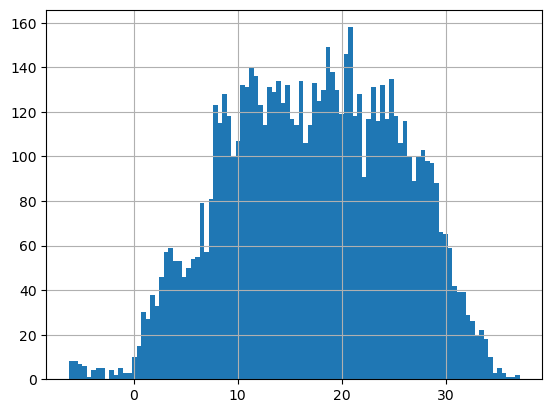

Histogram for AP


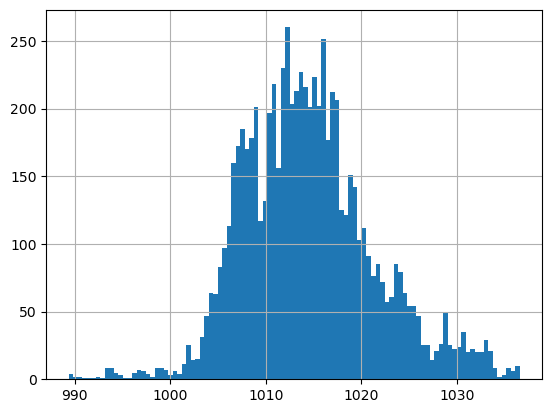

Histogram for AH


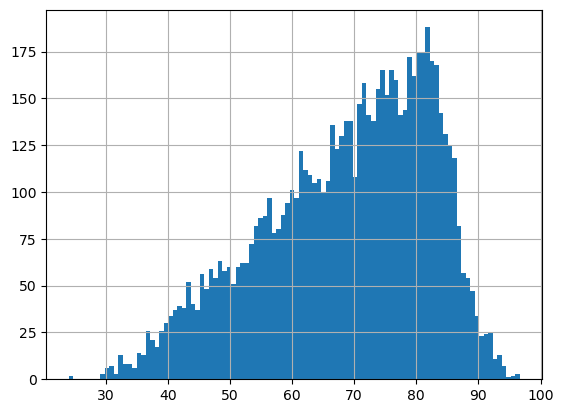

Histogram for AFDP


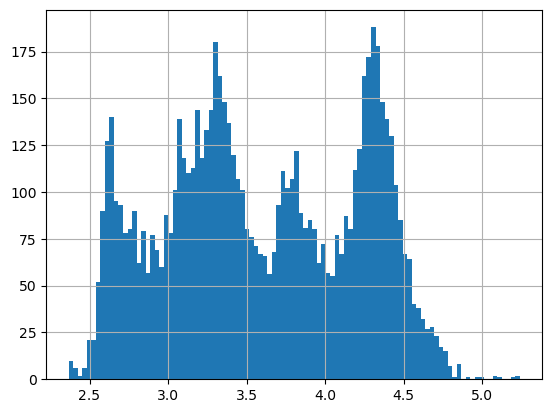

Histogram for GTEP


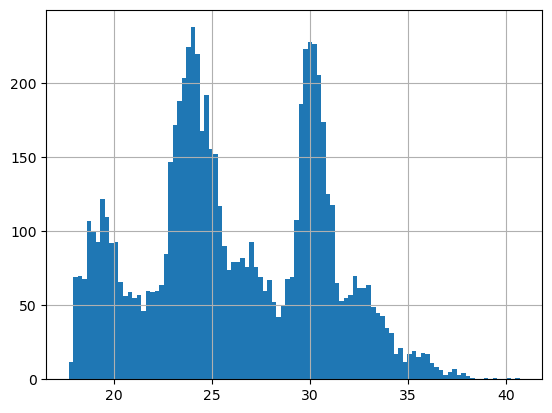

Histogram for TIT


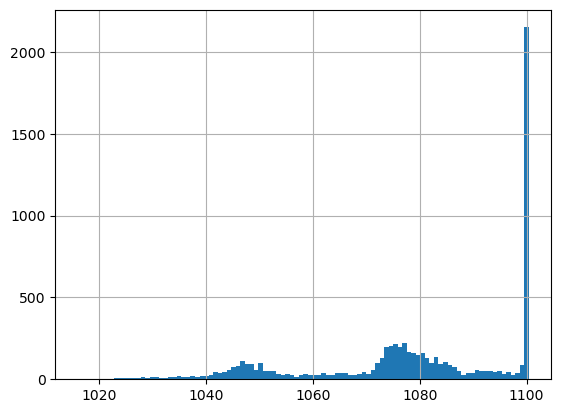

Histogram for TAT


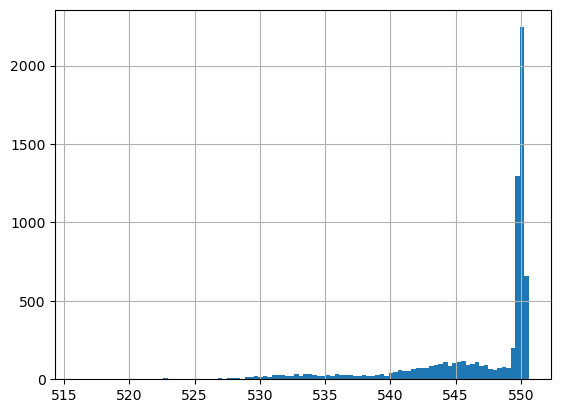

Histogram for TEY


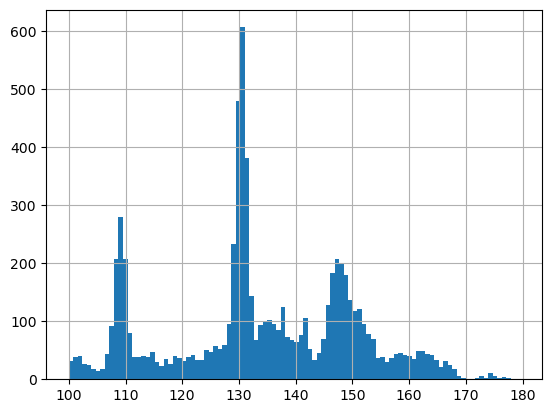

Histogram for CDP


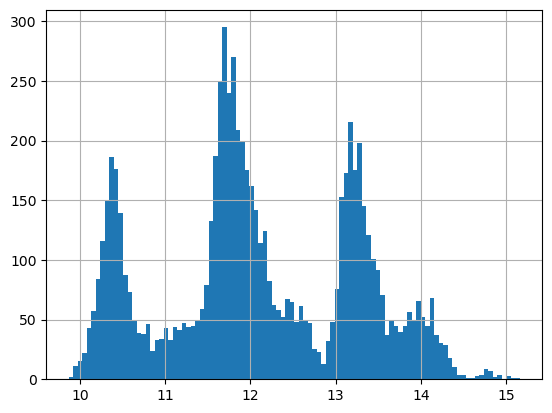

Histogram for CO


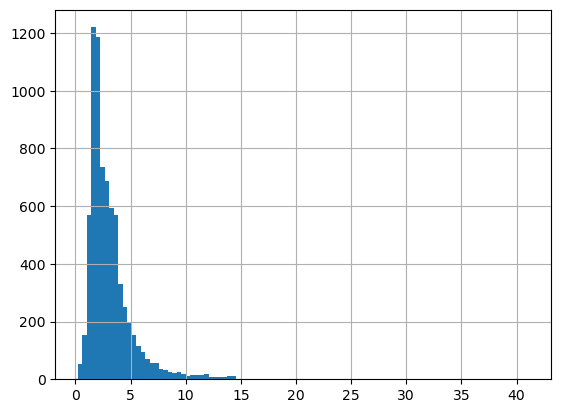

Histogram for NOX


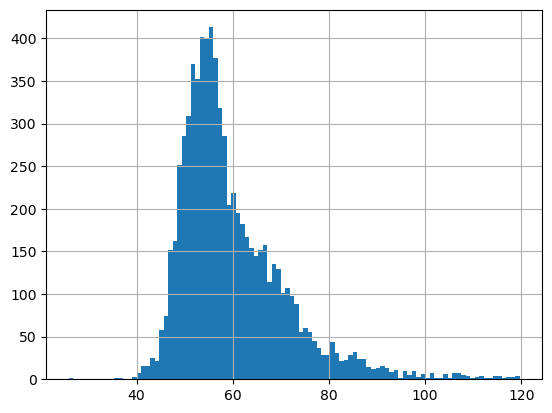

In [6]:
import matplotlib.pyplot as plt

cols = df.columns.to_list()

# посмотрим распределения
for col in cols:
  print(f'Histogram for {col}')
  df[col].hist(bins=100)
  plt.show()

**Выводы**:
1. Пропусков нет
2. Есть аномалии в распеределияних параметров:
 - TIT — температура на входе в турбину.
- TAT — температура на выходе из турбины. 

# Задание 2

Предположите по результатам разведочного анализа данных, какие группы электростанций существуют, чем они отличаются, каково их количество.

**Вывод**: наблюдается 3-4 группы электростанций, на основании распределений параметров:
- AFDP — перепад давления на воздушном фильтре.
- GTEP — давление на выходе из газовой турбины.
- TIT — температура на входе в турбину.

# Задание 3

Постройте модель кластеризации DBSCAN. Подберите оптимальные гиперпараметры, руководствуясь как результатами сеточного поиска, так и результатами анализа данных в предыдущих заданиях.

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# обучаем и трансформируем данные
df_scaled = scaler.fit_transform(df)

# снова превращаем в DataFrame с теми же колонками и индексами
df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)

In [37]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid


# cетка гиперпараметров
param_grid = {
    "eps": np.linspace(.1, 5, 30),       # радиус соседства
    "min_samples": range(5, 60, 2)       # минимальное число соседей
}

grid = ParameterGrid(param_grid)

# сделаем поиск оптимального числа кластеров по методу силуэта
results = []
metrics = []
n_clusters = []
for params in grid:
    dbscan = DBSCAN(eps=params["eps"], min_samples=params["min_samples"])
    labels = dbscan.fit_predict(df_scaled)
    #print(params)
    #print(labels)
    # число кластеров БЕЗ шума
    k = len(set(labels)) - (1 if -1 in labels else 0)

    # доля выбросов
    n_noise = np.sum(labels == -1)
    noise_frac = n_noise / len(labels)  # доля выбросов

    # маска «не шум»
    mask = labels != -1
    if k >= 2 and noise_frac < 0.3:  # фильтруем по доле выбросов
        score = silhouette_score(df[mask], labels[mask])
        #score = silhouette_score(df, labels)
        results.append((params,score))
        metrics.append(score)

        
        n_clusters.append(k)-
        print(f'n_clusters={k}    score={score}')
        print(params)

print('поиск закончен')

n_clusters=58    score=-0.3641675586811284
{'eps': 0.6068965517241379, 'min_samples': 5}
n_clusters=55    score=-0.24127642776418648
{'eps': 0.6068965517241379, 'min_samples': 7}
n_clusters=30    score=-0.4374341441901733
{'eps': 0.7758620689655172, 'min_samples': 5}
n_clusters=19    score=-0.332990963356869
{'eps': 0.7758620689655172, 'min_samples': 7}
n_clusters=14    score=-0.3300622708632318
{'eps': 0.7758620689655172, 'min_samples': 9}
n_clusters=12    score=-0.3178602807951469
{'eps': 0.7758620689655172, 'min_samples': 11}
n_clusters=8    score=-0.1784060104878205
{'eps': 0.7758620689655172, 'min_samples': 13}
n_clusters=8    score=-0.17676878278063815
{'eps': 0.7758620689655172, 'min_samples': 15}
n_clusters=6    score=-0.09856738006830293
{'eps': 0.7758620689655172, 'min_samples': 17}
n_clusters=6    score=-0.07883070524420063
{'eps': 0.7758620689655172, 'min_samples': 19}
n_clusters=6    score=-0.05263203293399587
{'eps': 0.7758620689655172, 'min_samples': 21}
n_clusters=7    

In [38]:
import seaborn as sns

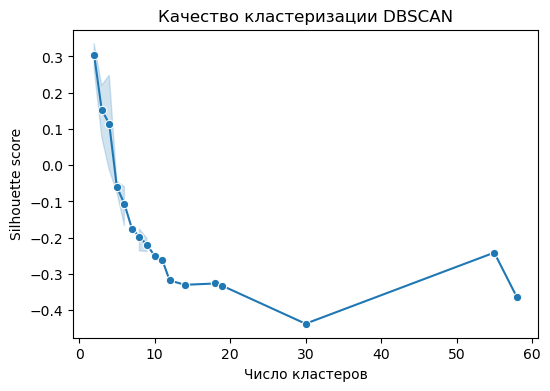

In [39]:
plt.figure(figsize=(6, 4))
ax = sns.lineplot(x=n_clusters, y=metrics, marker="o")

plt.xlabel("Число кластеров")
plt.ylabel("Silhouette score")
plt.title("Качество кластеризации DBSCAN")
plt.show()

In [40]:
# сортировка по метрике силуэта
results_sorted = sorted(results, key=lambda x: x[1], reverse=True)

best_params, best_score = results_sorted[0]

print("Лучшие параметры:", best_params)
print("Силуэт:", best_score)

Лучшие параметры: {'eps': 1.4517241379310346, 'min_samples': 39}
Силуэт: 0.3995650762520093


In [41]:
#results_sorted

In [42]:
dbscan_best = DBSCAN(eps=best_params["eps"], min_samples=best_params["min_samples"])
dbscan_best.fit(df_scaled)

,eps,1.4517241379310346
,min_samples,39
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [43]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=20)
df_emb = tsne.fit_transform(df_scaled)
data = pd.DataFrame(df_emb)
data

,0,1
0,-51.159863,-53.170254
1,-50.924732,-53.064838
2,-20.039488,-50.546032
3,-20.305681,-51.763920
4,-19.004791,-51.930283
...,...,...
7379,-59.995911,-48.885273
7380,-59.961128,-48.898239
7381,-59.868748,-48.998695
7382,-23.399815,-87.909294


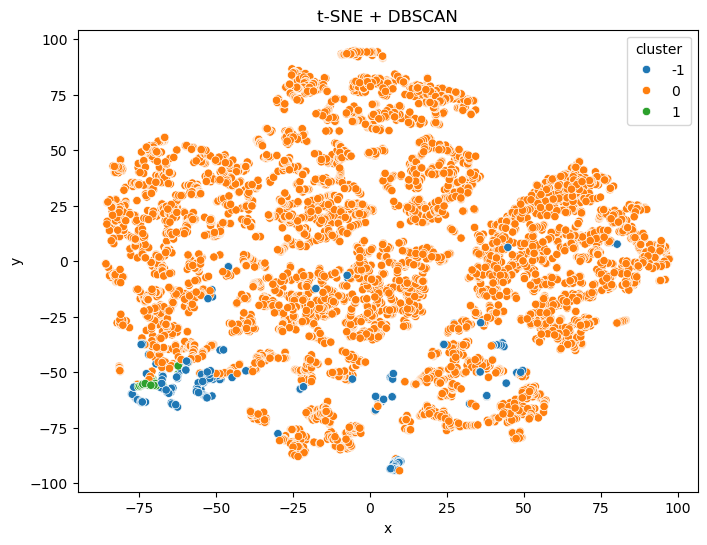

In [44]:
# визиализируем t-SNE

# метки кластеров из DBSCAN
labels = dbscan_best.labels_

data = pd.DataFrame(df_emb, columns=["x", "y"])
data["cluster"] = labels

# визуализация
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="x", y="y",
    hue="cluster",
    data=data,
    palette="tab10",   # цветовая палитра
    legend="full"
)
plt.title("t-SNE + DBSCAN")
plt.show()

### Посмотрим/подберем оптимальный eps для DBSCAN через график расстояний

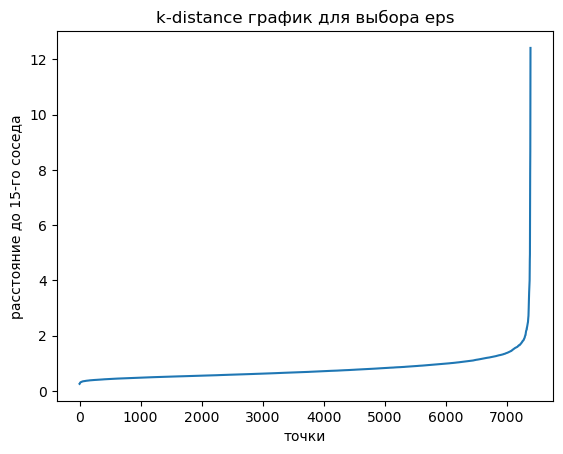

In [45]:
from sklearn.neighbors import NearestNeighbors

k = 15  # пусть это min_samples
nn = NearestNeighbors(n_neighbors=k)
nn.fit(df_scaled)
distances, _ = nn.kneighbors(df_scaled)
distances = np.sort(distances[:, -1])

plt.plot(distances)
plt.ylabel(f"расстояние до {k}-го соседа")
plt.xlabel("точки")
plt.title("k-distance график для выбора eps")
plt.show()

In [46]:
dbscan_elb = DBSCAN(eps=2, min_samples=15)
dbscan_elb.fit(df_scaled)

,eps,2
,min_samples,15
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [47]:
tsne = TSNE(n_components=2, perplexity=20)
df_emb = tsne.fit_transform(df_scaled)
data = pd.DataFrame(df_emb)
data

,0,1
0,-51.159863,-53.170254
1,-50.924732,-53.064838
2,-20.039488,-50.546032
3,-20.305681,-51.763920
4,-19.004791,-51.930283
...,...,...
7379,-59.995911,-48.885273
7380,-59.961128,-48.898239
7381,-59.868748,-48.998695
7382,-23.399815,-87.909294


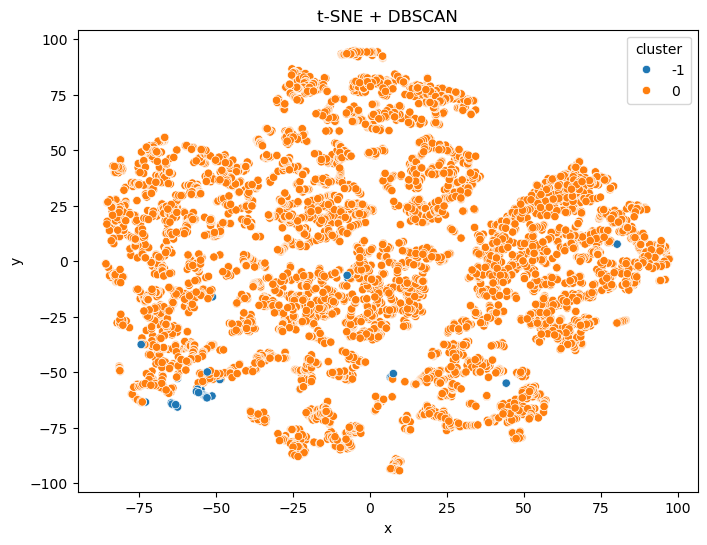

In [48]:
# визиализируем t-SNE

# метки кластеров из DBSCAN
labels = dbscan_elb.labels_

data = pd.DataFrame(df_emb, columns=["x", "y"])
data["cluster"] = labels

# визуализация
plt.figure(figsize=(8,6))
sns.scatterplot(
    x="x", y="y",
    hue="cluster",
    data=data,
    palette="tab10",   # цветовая палитра
    legend="full"
)
plt.title("t-SNE + DBSCAN")
plt.show()

**Вывод**: Полученный набор кластеров практически не отличается от найденного с помощью сетки. Но намного быстрее

# Задание 4

Интерпретируйте результаты кластеризации: объясните, чем схожи электростанции в каждом кластере и чем аномальные электростанции отличаются от остальных. 

In [49]:
# добавим номера кластеров в DataFrame
df_scaled_best=df_scaled.copy()

In [50]:
df_scaled_best["cluster"] = dbscan_best.labels_
df_scaled_best.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,cluster
0,-1.886549,0.810866,1.206595,-1.751125,-1.344414,-1.532034,-0.313824,-1.095516,-1.142101,1.932653,4.793468,-1
1,-1.977232,0.810866,1.394037,-1.975155,-1.686881,-1.693968,0.338426,-1.533762,-1.539805,1.493824,4.682972,-1
2,-2.010579,1.115436,0.715465,-1.343871,-0.864246,-0.514884,0.602605,-0.501504,-0.739998,0.225305,2.538378,0
3,-2.003371,1.042919,0.612586,-1.281431,-0.619691,-0.191016,0.544304,-0.110234,-0.347573,0.030076,2.442346,0
4,-1.968993,1.028416,0.597077,-1.247506,-0.591749,-0.140412,0.553413,-0.025552,-0.316777,-0.334116,2.032436,0


In [51]:
# убираем кластер выбросов
df_best_no_noise = df_scaled_best[df_scaled_best["cluster"] != -1].copy()
df_best_no_noise.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,cluster
2,-2.010579,1.115436,0.715465,-1.343871,-0.864246,-0.514884,0.602605,-0.501504,-0.739998,0.225305,2.538378,0
3,-2.003371,1.042919,0.612586,-1.281431,-0.619691,-0.191016,0.544304,-0.110234,-0.347573,0.030076,2.442346,0
4,-1.968993,1.028416,0.597077,-1.247506,-0.591749,-0.140412,0.553413,-0.025552,-0.316777,-0.334116,2.032436,0
5,-1.901533,1.042919,0.573369,-1.242098,-0.589066,-0.130291,0.597139,-0.025552,-0.235829,-0.469295,1.913676,0
6,-1.871627,1.086429,0.541095,-1.312405,-0.712014,-0.266923,0.608071,-0.152266,-0.360771,-0.392465,2.091367,0


In [52]:
df_best_no_noise.shape

(7107, 12)

In [53]:
# профиль кластеров в масштабированных единицах 
profiles_scaled = df_best_no_noise.groupby("cluster").mean()

In [54]:
# обратное преобразование профилей в ИСХОДНЫЕ единицы 
# убираем столбец cluster перед inverse_transform
centers_scaled = profiles_scaled[df.columns]

In [55]:
centers_original = scaler.inverse_transform(centers_scaled.values)
profiles_original = pd.DataFrame(
    centers_original,
    index=profiles_scaled.index,
    columns=df.columns
)

In [56]:
print("Профили кластеров в исходных единицах:")
display(profiles_original)

Профили кластеров в исходных единицах:


,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
cluster,,,,,,,,,,,
0,17.633494,1014.163503,68.666959,3.614018,26.198597,1079.873648,546.996892,134.297182,12.115100,2.911606,58.895022
1,13.191951,1023.951111,72.230667,2.617427,18.287667,1029.608889,540.666889,102.621778,10.192989,11.941567,92.194867


**В чем схожи электростанции по кластерам**
-    AP — давление окружающей среды.
-    AH — влажность окружающей среды.
-    TIT — температура на входе в турбину.
-    TAT — температура на выходе из турбины.

**В чем различаются электростанции по кластерам**
-    AT — температура окружающей среды.
-    AFDP — перепад давления на воздушном фильтре.
-    GTEP — давление на выходе из газовой турбины.
-    TEY — энергоотдача турбины.
-    CDP — давление нагнетания компрессора.
-    CO — выбросы угарного газа.
-    NOX — выбросы оксидов азота.

### Визуализация профилей 

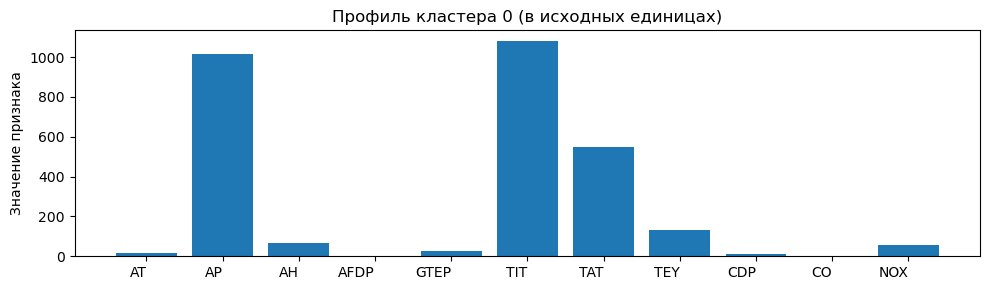

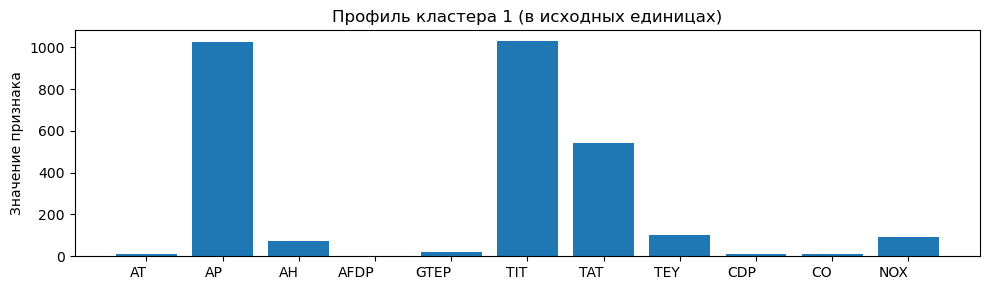

In [57]:
# для каждой кластера рисуем отдельный барчарт по признакам.
# один график на фигуру, без указания цветов.

for cl in profiles_original.index:
    vals = profiles_original.loc[cl].values
    feats = profiles_original.columns.tolist()

    plt.figure(figsize=(10, 3))
    plt.bar(range(len(feats)), vals)
    plt.xticks(range(len(feats)), feats, ha="right")
    plt.title(f"Профиль кластера {cl} (в исходных единицах)")
    plt.ylabel("Значение признака")
    plt.tight_layout()
    plt.show()

### Сделаем напоследок heatmap как в уроках

In [58]:
# Обратное преобразование ТОЛЬКО для признаков
feature_cols = df_best_no_noise.columns[:-1]  # исключим столбец кластеров
df_back = df_best_no_noise.copy()
df_back[feature_cols] = scaler.inverse_transform(df_best_no_noise[feature_cols].values)

df_back.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,cluster
2,0.94915,1022.2,78.335,2.7789,22.264,1068.8,549.95,125.88,11.256,3.6335,88.147,0
3,1.00750,1021.7,76.942,2.8170,23.358,1075.2,549.63,132.21,11.702,3.1972,87.078,0
4,1.28580,1021.6,76.732,2.8377,23.483,1076.2,549.68,133.58,11.737,2.3833,82.515,0
5,1.83190,1021.7,76.411,2.8410,23.495,1076.4,549.92,133.58,11.829,2.0812,81.193,0
6,2.07400,1022.0,75.974,2.7981,22.945,1073.7,549.98,131.53,11.687,2.2529,83.171,0


In [59]:
features = df_back.columns[:-1]
df_g = df_back.groupby('cluster').agg({x: ['mean', 'std'] for x in features}).T
df_g

cluster              0            1
AT   mean    17.633494    13.191951
     std      7.861505     2.910019
AP   mean  1014.163503  1023.951111
     std      6.489494     4.489008
AH   mean    68.666959    72.230667
     std     13.483926     8.347078
AFDP mean     3.614018     2.617427
     std      0.598402     0.045804
GTEP mean    26.198597    18.287667
     std      4.333786     0.338308
TIT  mean  1079.873648  1029.608889
     std     18.627990     2.788028
TAT  mean   546.996892   540.666889
     std      5.024516     1.581801
TEY  mean   134.297182   102.621778
     std     15.501775     2.421321
CDP  mean    12.115100    10.192989
     std      1.100342     0.128607
CO   mean     2.911606    11.941567
     std      1.610814     0.935454
NOX  mean    58.895022    92.194867
     std      9.365600     6.150722

In [60]:
functions = ['mean', 'std']

stat = np.array([[df_back[feature].apply(f) for f in functions] for feature in features]).flatten()

df_g_rel = df_g.copy()
df_g_rel['Global'] = stat
df_g_rel

cluster              0            1       Global
AT   mean    17.633494    13.191951    17.605371
     std      7.861505     2.910019     7.847831
AP   mean  1014.163503  1023.951111  1014.225476
     std      6.489494     4.489008     6.524909
AH   mean    68.666959    72.230667    68.689524
     std     13.483926     8.347078    13.460172
AFDP mean     3.614018     2.617427     3.607708
     std      0.598402     0.045804     0.601731
GTEP mean    26.198597    18.287667    26.148507
     std      4.333786     0.338308     4.365465
TIT  mean  1079.873648  1029.608889  1079.555382
     std     18.627990     2.788028    18.993451
TAT  mean   546.996892   540.666889   546.956812
     std      5.024516     1.581801     5.035228
TEY  mean   134.297182   102.621778   134.096620
     std     15.501775     2.421321    15.656727
CDP  mean    12.115100    10.192989    12.102929
     std      1.100342     0.128607     1.107446
CO   mean     2.911606    11.941567     2.968782
     std      1.610814     0.935454     1.759775
NOX  mean    58.895022    92.194867    59.105869
     std      9.365600     6.150722     9.714472

In [61]:
cluster_labels = [0, 1 ]

for label in cluster_labels:
  df_g_rel[label] = 100 * df_g_rel[label] / df_g_rel['Global'] - 100

df_g_rel

cluster           0           1       Global
AT   mean  0.159740  -25.068598    17.605371
     std   0.174239  -62.919453     7.847831
AP   mean -0.006110    0.958922  1014.225476
     std  -0.542755  -31.201980     6.524909
AH   mean -0.032850    5.155288    68.689524
     std   0.176482  -37.986839    13.460172
AFDP mean  0.174909  -27.449036     3.607708
     std  -0.553219  -92.387874     0.601731
GTEP mean  0.191561  -30.062290    26.148507
     std  -0.725657  -92.250353     4.365465
TIT  mean  0.029481   -4.626580  1079.555382
     std  -1.924142  -85.321108    18.993451
TAT  mean  0.007328   -1.149985   546.956812
     std  -0.212734  -68.585314     5.035228
TEY  mean  0.149565  -23.471764   134.096620
     std  -0.989683  -84.534946    15.656727
CDP  mean  0.100557  -15.780812    12.102929
     std  -0.641434  -88.387065     1.107446
CO   mean -1.925900  302.237951     2.968782
     std  -8.464752  -46.842434     1.759775
NOX  mean -0.356728   55.982592    59.105869
     std  -3.591257  -36.684953     9.714472

<Axes: xlabel='cluster', ylabel='None-None'>

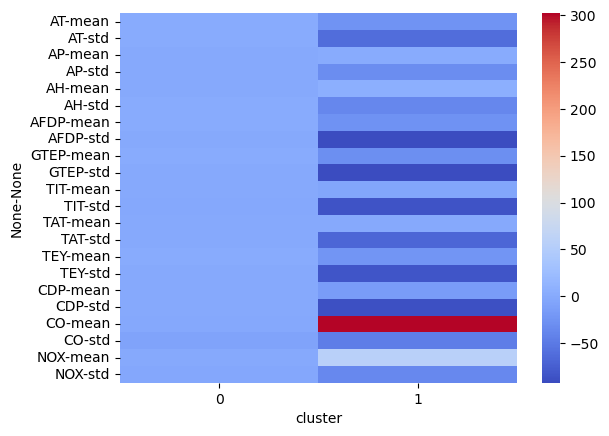

In [62]:
sns.heatmap(df_g_rel[cluster_labels], cmap='coolwarm')

In [63]:
df_back['cluster'].value_counts()

cluster
0    7062
1      45
Name: count, dtype: int64

**Как отправить работу на проверку**

Скачайте файл с работой в материалах, откройте его через Jupyter Notebook и выполните задания. Сохраните изменения при помощи опции Save and Checkpoint на вкладке меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте через форму ниже итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него.
